# TD 4 - La régression linéaire - algo. de descente du gradient

## Packages utiles

In [33]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Les données

In [2]:
#66 Import des données
boston = datasets.load_boston()
print(boston.DESCR)
#0- CRIM     per capita crime rate by town
#1- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#2- INDUS    proportion of non-retail business acres per town
#3- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#4- NOX      nitric oxides concentration (parts per 10 million)
#5- RM       average number of rooms per dwelling
#6- AGE      proportion of owner-occupied units built prior to 1940
#7- DIS      weighted distances to five Boston employment centres
#8- RAD      index of accessibility to radial highways
#9- TAX      full-value property-tax rate per $10,000
#10- PTRATIO  pupil-teacher ratio by town
#11- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#12- LSTAT    % lower status of the population
#13- MEDV     Median value of owner-occupied homes in $1000's


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#-- Récupérer les variables explicatives (X) et leur nom, la variable à expliquer (Y)
X = boston.data
names = boston.feature_names
Y = boston.target

### Analyser et sélectionner les données étudiées

In [4]:
#-- Afficher les statistiques descriptives
print(stats.describe(X))
print(names)
print(stats.describe(Y))

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

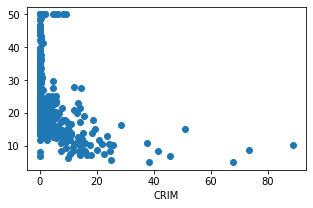

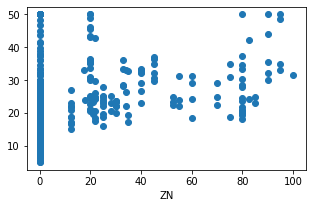

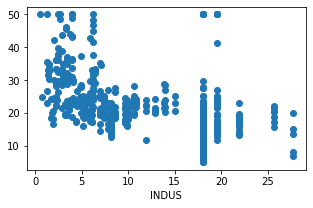

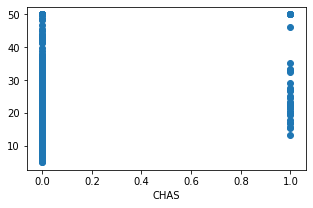

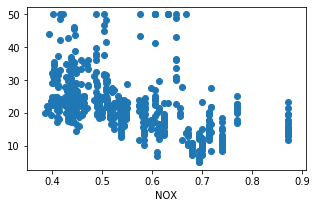

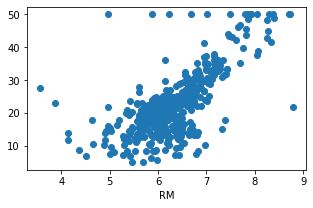

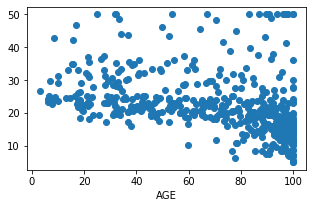

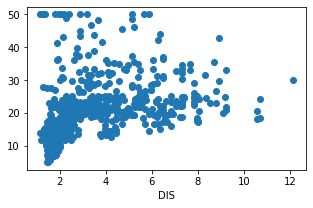

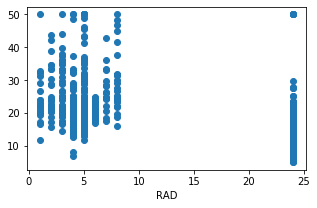

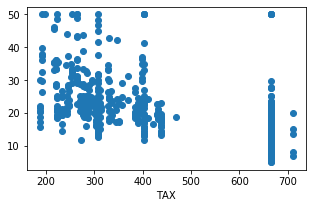

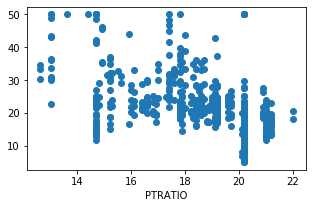

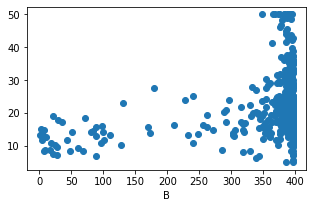

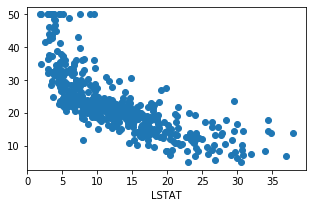

In [5]:
#-- Sélectionner les variables pour la régression simple puis multiple et afficher les (scatterplot)

for i in range(X.shape[1]):
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,i],Y)
    plt.xlabel(names[i])
    plt.show()



In [59]:
#-- Préparer les données étudiées
m,d = X.shape
k = 6
kk = 2
xx = np.hstack((np.ones((m,1)),X))
x1 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,k],(m,1))))
x2 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,kk],(m,1)), np.reshape(xx[:,k],(m,1))))
print(x2)


[[ 1.    18.     6.575]
 [ 1.     0.     6.421]
 [ 1.     0.     7.185]
 ...
 [ 1.     0.     6.976]
 [ 1.     0.     6.794]
 [ 1.     0.     6.03 ]]


## Algorithme de descente du gradient

Code des fonctions et tests de ces fonctions dans le cas de la régression simple et multiple

ATTENTION : les paramètres des fonctions sont à compléter


In [34]:
#-- Modèle

def f(x,B):
    return np.dot(x,B)

B1 = [2,3]
B2 = [2,3,1]

#-- Test 1 - reg simple
print(f(x1,B1))

#-- Test 2 - reg multiple

print(f(x2,B2))


[3.614  3.407  3.407  3.374  3.374  3.374  3.572  3.572  3.572  3.572
 3.572  3.572  3.572  3.614  3.614  3.614  3.614  3.614  3.614  3.614
 3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614
 3.614  3.614  3.614  3.614  3.614  3.497  3.497  3.497  3.497  3.284
 3.284  3.344  3.344  3.344  3.344  3.344  3.344  3.344  3.344  3.344
 3.317  3.317  3.317  3.317  3.23   3.209  3.23   3.233  3.359  3.359
 3.359  3.359  3.359  3.359  3.2483 3.194  3.194  3.227  3.227  3.227
 3.239  3.239  3.239  3.239  3.311  3.311  3.311  3.311  3.311  3.311
 3.278  3.278  3.278  3.278  3.347  3.347  3.347  3.347  3.467  3.467
 3.467  3.467  3.392  3.392  3.392  3.335  3.335  3.335  3.335  3.335
 3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56
 3.56   3.641  3.641  3.641  3.641  3.641  3.641  3.641  3.641  3.641
 3.743  3.743  3.743  3.743  3.743  3.743  3.743  3.872  3.872  3.872
 3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872
 3.872  3.872  4.613 

In [35]:
#%% Fonction-cout
def cout(x,y,B):
    return (np.sum((f(x,B)-y)**2))/(2*x.shape[0])
#%% Test 1 - reg simple
print(cout(x1,Y,B1))
#%% Test 2 - reg multiple
print(cout(x2,Y,B2))

221.64793909170947
2349.4674978854646


In [36]:
#%% Gradient
def grad(x,y,B):
    #b = B.copy()
    #b[0] = b[0] - (pas * np.sum(f(x,B)-y) / x.shape[0])
    #b[1:] = b[1:] - (pas * np.sum(np.dot(f(x,B)-y,x)) / x.shape[0])
    #return b
    m = X.shape[0]
    return 1/m * np.dot((f(x,B)-y),x)
#%% Test 1 - reg simple
print(grad(x1,Y,B1))

#%% Test 2 - reg multiple
print(grad(x2,Y,B2))

[-18.86872115  -9.97167069]
[  14.11279783 1710.40245405    4.11604569]


In [38]:

#--- standardisation des X (données centrées-réduites)
# attention : ne pas standardiser X^0...
def standardisation(X):
    x = X[:,1:]
    return np.hstack((X[:,:1],(x - x.mean(axis=0)) / x.std(axis=0,ddof=0)))
#-- Test 1 - reg simple
print(standardisation(x1))

#-- Test 2 - reg multiple
print(standardisation(x2))

[[ 1.         -0.14421743]
 [ 1.         -0.74026221]
 [ 1.         -0.74026221]
 ...
 [ 1.          0.15812412]
 [ 1.          0.15812412]
 [ 1.          0.15812412]]
[[ 1.          0.28482986 -0.14421743]
 [ 1.         -0.48772236 -0.74026221]
 [ 1.         -0.48772236 -0.74026221]
 ...
 [ 1.         -0.48772236  0.15812412]
 [ 1.         -0.48772236  0.15812412]
 [ 1.         -0.48772236  0.15812412]]


In [41]:
#%% Algo de descente du gradient
def grad_descent(init,x,y,pas,epsi,ITE_MAX):
    cout_arr = []
    B = np.asarray(init).astype(float)
    new_B = B.copy()
    b_arr = [B]
    nbIt = 0
    x_normalize = standardisation(x) #On suppose que le bias est déjà présent
    #print(stats.describe(x_normalize))
    old_cout = cout(x_normalize,y,B)
    new_cout = 0
    while(np.abs(new_cout-old_cout)>epsi and nbIt < ITE_MAX):
        new_B = B - pas * grad(x_normalize,y,B)
        #B = grad(x_normalize,y,B,pas)
        B = new_B.copy()
        old_cout = new_cout
        new_cout = cout(x_normalize,y,B)
        b_arr.append(B.tolist())
        cout_arr.append(new_cout)
        nbIt += 1
    return b_arr,cout_arr
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.1,10,500)
print(b)
print(c)
#-- Test 2 - reg multiple
print()
b, c = grad_descent((0,0,0),x2,Y,0.05,10,500)
print(b)
print(c)

[array([0., 0.]), [2.253280632411067, -0.3926228190102926], [4.281233201581027, -0.7459833561195561], [6.106390513833991, -1.064007839517893], [7.74903209486166, -1.350229874576396], [9.22740951778656, -1.6078297061290487], [10.55794919841897, -1.8396695545264363], [11.755434910988141, -2.048325418084085], [12.833172052300394, -2.2361156952859687], [13.803135479481423, -2.4051269447676638]]
[246.37490877716283, 206.11908350326559, 173.51186503140872, 147.1000180692047, 125.70642202981946, 108.3776092379174, 94.34127087647673, 82.97183680370979, 73.76259520476854]

[array([0., 0., 0.]), [1.1266403162055334, 0.16558879839386803, -0.1963114095051427], [2.19694861660079, 0.31782739676607796, -0.37853005917377586], [3.2137415019762843, 0.4577473237169661, -0.5477054251392965], [4.179694743083004, 0.5863014232537624, -0.7048078651534487], [5.097350322134387, 0.7043698326627121, -0.8507346069430339], [5.969123122233202, 0.8127655068072265, -0.986315282739239], [6.7973072823270755, 0.912239323

## Test avec plusieurs initialisations : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

In [80]:
def display(title,data_X,data_Y,data_b):
    print("Betas :",data_b[-1])
    plt.figure(1,figsize=(10,6))
    plt.title(title)
    plt.scatter(standardisation(data_X)[:,1],data_Y)
    x_lim = plt.xlim()
    x = np.linspace(x_lim[0],x_lim[1],100)
    y = data_b[0][0] + (x*data_b[0][1])
    plt.plot(x,y,color='green')
    for i in range(1,len(data_b)-1,10): 
        y = data_b[i][0] + (x*data_b[i][1])
        plt.plot(x,y,color='gray')
    y = data_b[-1][0] + (x*data_b[-1][1])
    plt.plot(x,y,color='red')
    plt.xlabel(names[k-1])
    plt.ylabel("Boston House prices")
    plt.show()
    
def display3D(title,data_X,data_Y,data_b):
    print("Betas :",data_b[-1])
    fig = plt.figure(1,figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    xx = standardisation(data_X)
    ax.scatter(xx[:,1],xx[:,2],data_Y,c='r', marker='o')
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    x = np.arange(x_lim[0], x_lim[1], 0.05)
    y = np.arange(y_lim[0], y_lim[1], 0.05)
    x, y = np.meshgrid(x, y)
    z = data_b[-1][0] + (x*data_b[-1][1]) + (y*data_b[-1][2])
    z = z.reshape(x.shape)
    ax.plot_wireframe(x,y,z,color='gray')
    ax.set_xlabel(names[kk-1])
    ax.set_ylabel(names[k-1])
    ax.set_zlabel("Boston House prices")
    plt.show()

Betas : [22.406070492765547, 6.353040413053021]


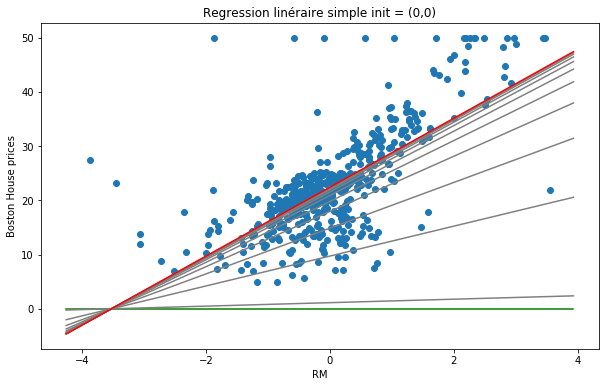

Betas : [22.411735040067686, 6.3379512898049875]


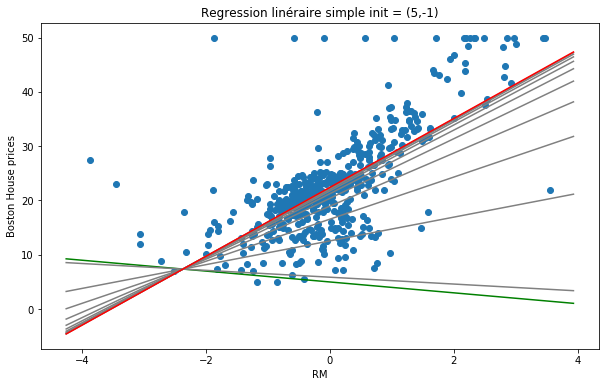

Betas : [22.412407284332872, 1.5199296820757724, 5.866689898479008]


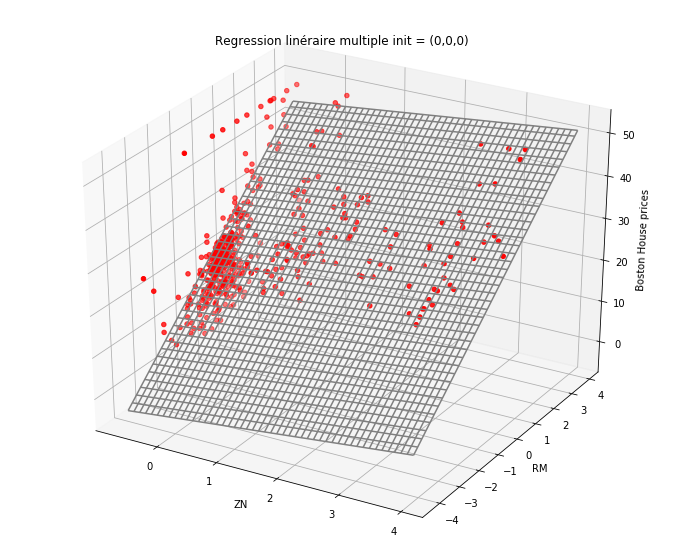

Betas : [22.433861705279174, 1.5475207544295073, 5.835166699467881]


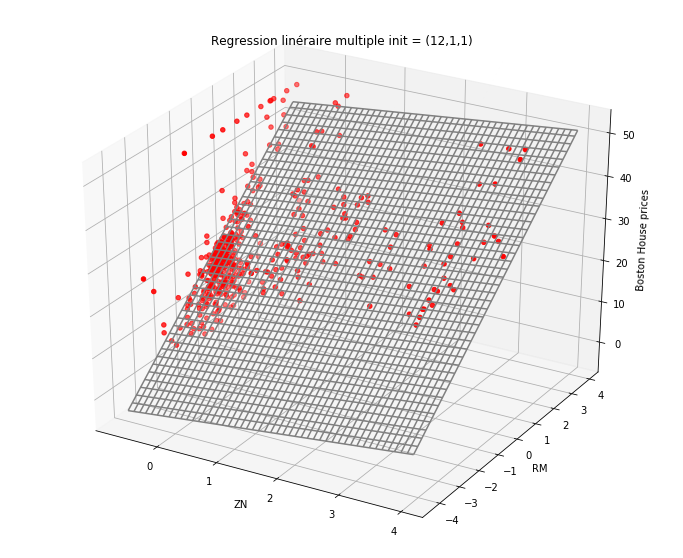

In [81]:
# -- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.05,0.001,1000)
display("Regression linéraire simple init = (0,0)",x1,Y,b)
b, c = grad_descent((5,-1),x1,Y,0.05,0.001,1000)
display("Regression linéraire simple init = (5,-1)",x1,Y,b)
#-- Test 2 - reg multiple
b, c = grad_descent((0,0,0),x2,Y,0.05,0.001,1000)
display3D("Regression linéraire multiple init = (0,0,0)",x2,Y,b)
b, c = grad_descent((12,1,1),x2,Y,0.05,0.001,1000)
display3D("Regression linéraire multiple init = (12,1,1)",x2,Y,b)

**Commentaires:**


## Test avec plusieurs pas de descente : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

Betas : [19.49550275504192, 5.527775024878102]


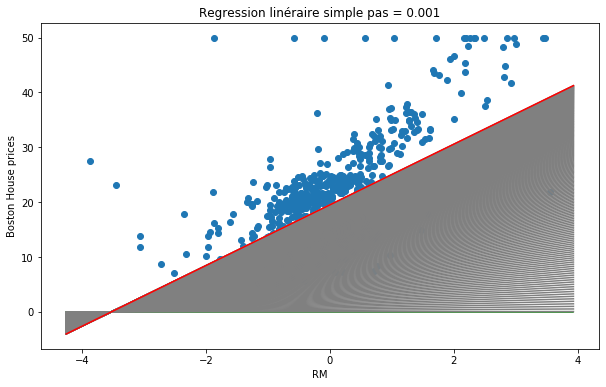

Betas : [21.58241692800185, 6.119500828993046]


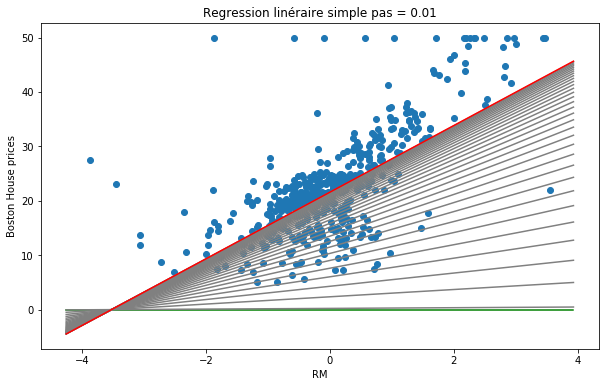

Betas : [22.263031958289528, 6.312483118973123]


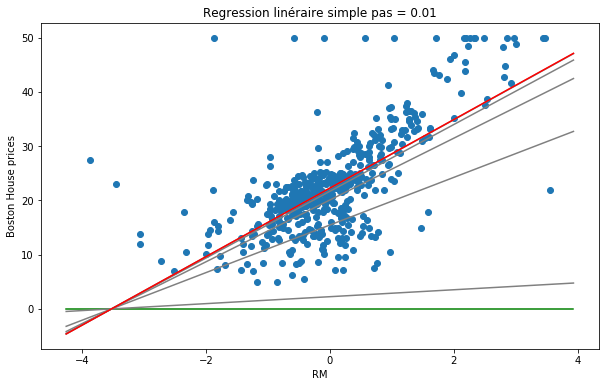

Betas : [8.869387000535006, 1.1282203823608061, 2.4304586900582765]


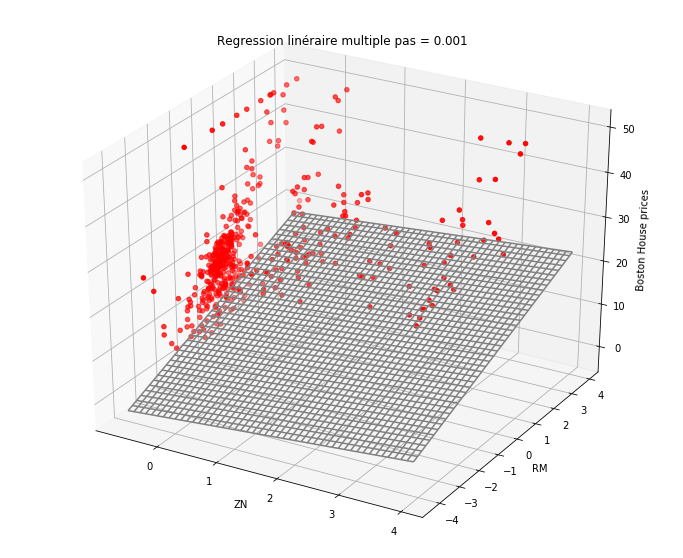

Betas : [21.652898531094287, 1.763729052248161, 5.423552045352303]


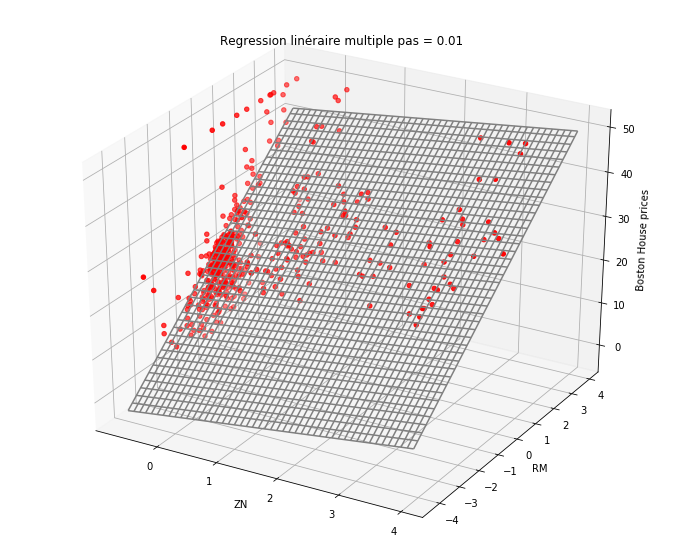

Betas : [22.295519054911704, 1.6154075357782465, 5.744388741165023]


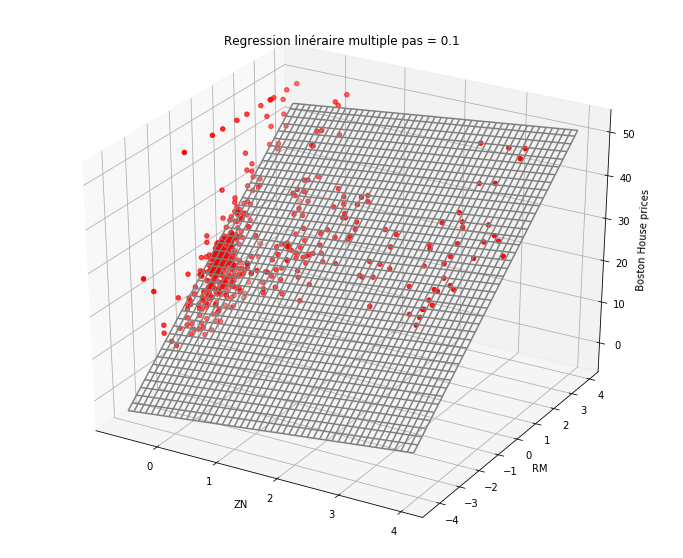

In [77]:
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.001,0.01,10000)
display("Regression linéraire simple pas = 0.001",x1,Y,b)
b, c = grad_descent((0,0),x1,Y,0.01,0.01,500)
display("Regression linéraire simple pas = 0.01",x1,Y,b)
b, c = grad_descent((0,0),x1,Y,0.1,0.01,500)
display("Regression linéraire simple pas = 0.01",x1,Y,b)


#-- Test 2 - reg multiple
b, c = grad_descent((0,0,0),x2,Y,0.001,0.01,500)
display3D("Regression linéraire multiple pas = 0.001",x2,Y,b)
b, c = grad_descent((12,1,1),x2,Y,0.01,0.01,500)
display3D("Regression linéraire multiple pas = 0.01",x2,Y,b)
b, c = grad_descent((12,1,1),x2,Y,0.1,0.01,500)
display3D("Regression linéraire multiple pas = 0.1",x2,Y,b)

**Commentaires:**

## Commentaires
**pour le choix du critère d'arrêt:**





**pour la standardisation des données:**





## Comparaison avec les résultats du maximum de vraisemblance

Betas : [22.53280632  6.38897522]


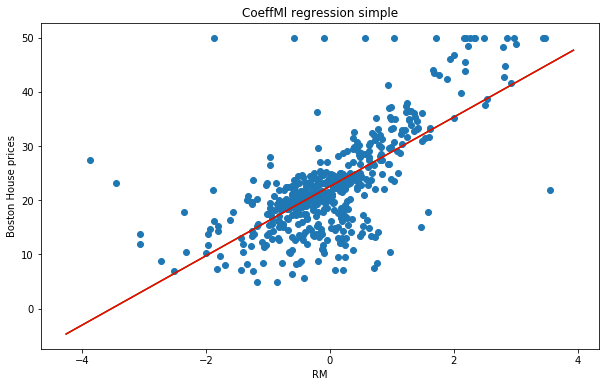

Betas : [22.53280632  1.46065307  5.93326521]


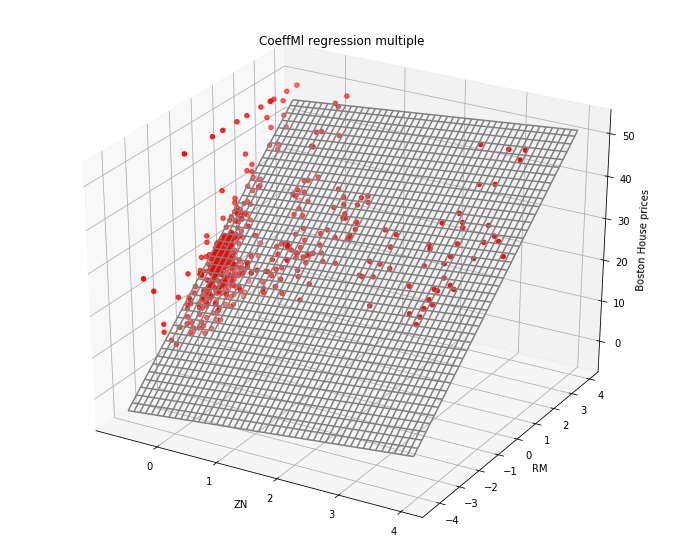

In [82]:
#-- Pour comparer avec le maximum de vraisemblance
#(X^T X)^-1 X^T Y
def coef_ml(x,y):
    x_standard = standardisation(x)
    trans = np.transpose(x_standard)
    return np.dot(np.dot(np.linalg.inv(np.dot(trans,x_standard)),trans),y)
    
#-- Test 1  - reg simple
maxi1 = coef_ml(x1,Y)
display("CoeffMl regression simple",x1,Y,[maxi1])
#-- Test 2 - reg multiple
maxi2 = coef_ml(x2,Y)
display3D("CoeffMl regression multiple",x2,Y,[maxi2])
#-- (ou bien utiliser la fonction native de sklearn)

**Commentaires:**